In [1]:
import csv
import copy
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 評価したい手法
approach = 'SL_SFL_Proto'
path = './../results/' + approach + '/mobilenet_v2_cifar10/'

date_dir_dict = {'ver1': ['2024-08-05/', '2024-08-06/'],
                 'ver2': ['2024-08-26/', '2024-08-27/'],
                 'ver3': ['2024-08-28/']
                 }

data_dir_list = ['accuracy', 'loss']
batch_type_list = ['B128', 'B64']
data_type_list = ['IID', 'N-IID-Diri-01', 'N-IID-Diri-005', 'N-IID-ClassSep',]
epoch_type_list = ['R25_E10', 'R50_E5']

num_version = len(date_dir_dict)

In [3]:
def make_templete():
    batch_dict = {}
    epoch_dict = {}
    data_type_dict = {}

    for data_type in data_type_list:
        data_type_dict[data_type] = None
    for epoch_type in epoch_type_list:
        epoch_dict[epoch_type] = copy.deepcopy(data_type_dict)
    for batch_type in batch_type_list:
        batch_dict[batch_type] = copy.deepcopy(epoch_dict)
    
    return batch_dict

In [4]:
def input_to_dict(app_dict, date_dir_list): # valueを引数にする
    for batch_type, epoch_dict in app_dict.items():
        for epoch_type, data_type_dict in epoch_dict.items():
            for data_type, _ in data_type_dict.items():

                data_dict = {'epoch': {'accuracy': [], 'loss': []}, 'accuracy': [], 'loss': []}

                for date_dir in date_dir_list:
                    for data_name in data_dir_list:

                        file_path = path + date_dir + data_name + '/' + data_type + '_' + batch_type + '_' + epoch_type + '_' + data_name + '.csv'

                        if os.path.isfile(file_path):
                            with open(file_path) as f:
                                csv_reader = csv.reader(f, delimiter=',')
                                for i, row in enumerate(csv_reader):
                                    if i == 0:
                                        continue
                                    else:
                                        data_dict['epoch'][data_name].append(float(row[0]))
                                        data_dict[data_name].append(float(row[1]))
                            if data_name == 'accuracy':
                                if len(data_dict['epoch'][data_name]) == 25:
                                    data_dict['epoch'][data_name] = [ x * 10 for x in data_dict['epoch'][data_name]]
                                elif len(data_dict['epoch'][data_name]) == 50:
                                    data_dict['epoch'][data_name] = [ x * 5 for x in data_dict['epoch'][data_name]]
                            elif data_name == 'loss':
                                if len(data_dict[data_name]) == 500:
                                    data_dict[data_name] = data_dict[data_name][0::2]
                                elif len(data_dict[data_name]) == 1000:
                                    data_dict[data_name] = data_dict[data_name][0::4]
                                data_dict['epoch'][data_name] = np.arange(1, len(data_dict[data_name])+1)
                    app_dict[batch_type][epoch_type][data_type] = data_dict

    return app_dict

In [5]:
version_dict = {}
for key, value in date_dir_dict.items():
    version_dict[key] = input_to_dict(make_templete(), date_dir_dict[key])

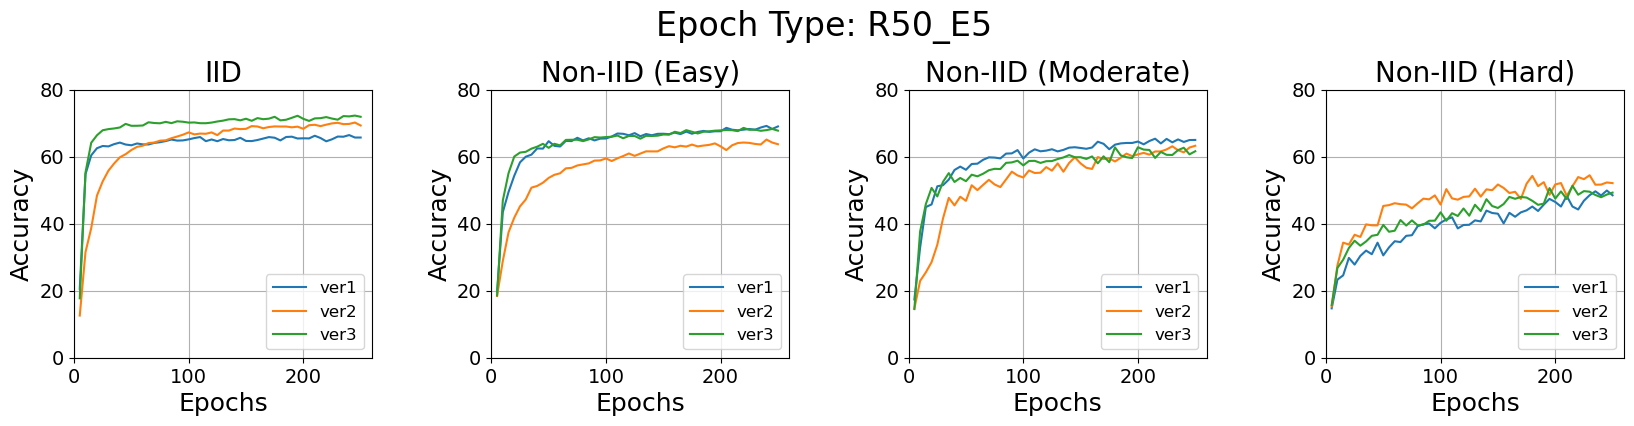

In [6]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.78)

for version, dict in version_dict.items():
    for j, data_type in enumerate(data_type_list):
        ax = axes[j]
        for i, epoch_type in enumerate(epoch_type_list):
            if epoch_type == 'R25_E10':
                continue
            for batch_type in batch_type_list:
                if batch_type == 'B64':
                    continue
                if dict[batch_type][epoch_type][data_type]['accuracy'] is not None:
                    epoch = dict[batch_type][epoch_type][data_type]['epoch']['accuracy']
                    accuracy = dict[batch_type][epoch_type][data_type]['accuracy']
                    ax.plot(epoch, accuracy, label=version)
        if data_type == 'IID':
            title = 'IID'
        elif data_type == 'N-IID-Diri-01':
            title = 'Non-IID (Easy)'
        elif data_type == 'N-IID-Diri-005':
            title = 'Non-IID (Moderate)'
        elif data_type == 'N-IID-ClassSep':
            title = 'Non-IID (Hard)'
        # ax.set_title(epoch_type + '_' + data_type)
        ax.set_title(title, fontsize=20)
        ax.set_xlabel('Epochs', fontsize=18)
        ax.set_ylabel('Accuracy', fontsize=18)
        ax.set_ylim((0, 80))
        ax.set_xlim((0, 260))
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)
        ax.grid(True)
        ax.legend(loc='lower right', fontsize=12)
fig.suptitle('Epoch Type: R50_E5', fontsize=24)
plt.show()

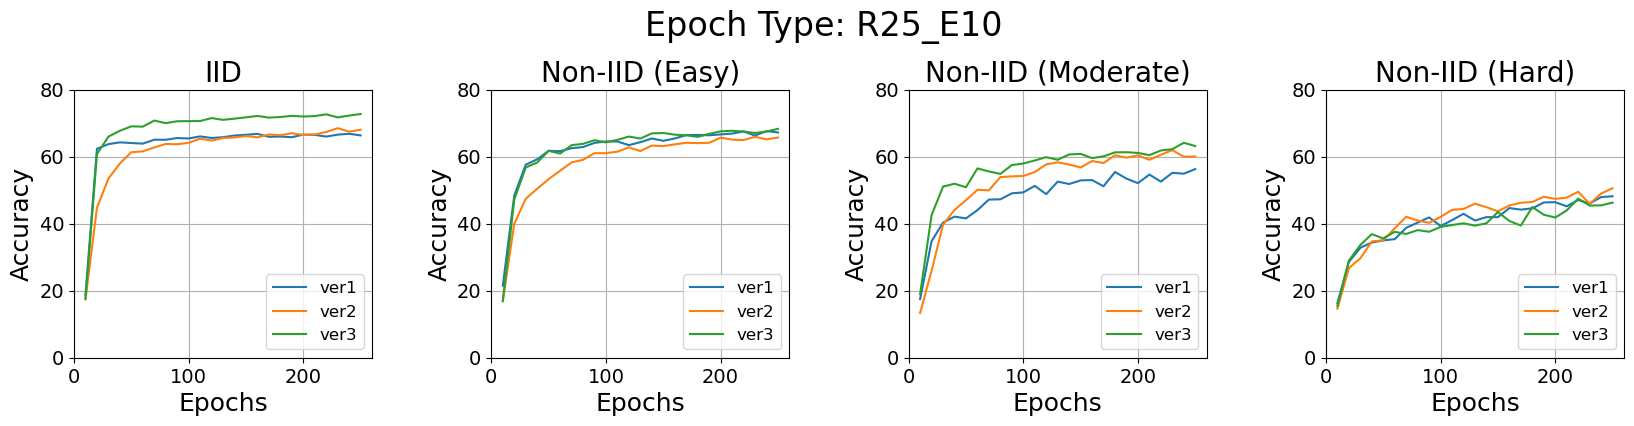

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.78)

for version, dict in version_dict.items():
    for j, data_type in enumerate(data_type_list):
        ax = axes[j]
        for i, epoch_type in enumerate(epoch_type_list):
            if epoch_type == 'R50_E5':
                continue
            for batch_type in batch_type_list:
                if batch_type == 'B64':
                    continue
                if dict[batch_type][epoch_type][data_type]['accuracy'] is not None:
                    epoch = dict[batch_type][epoch_type][data_type]['epoch']['accuracy']
                    accuracy = dict[batch_type][epoch_type][data_type]['accuracy']
                    ax.plot(epoch, accuracy, label=version)
        if data_type == 'IID':
            title = 'IID'
        elif data_type == 'N-IID-Diri-01':
            title = 'Non-IID (Easy)'
        elif data_type == 'N-IID-Diri-005':
            title = 'Non-IID (Moderate)'
        elif data_type == 'N-IID-ClassSep':
            title = 'Non-IID (Hard)'
        # ax.set_title(epoch_type + '_' + data_type)
        ax.set_title(title, fontsize=20)
        ax.set_xlabel('Epochs', fontsize=18)
        ax.set_ylabel('Accuracy', fontsize=18)
        ax.set_ylim((0, 80))
        ax.set_xlim((0, 260))
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)
        ax.grid(True)
        ax.legend(loc='lower right', fontsize=12)
fig.suptitle('Epoch Type: R25_E10', fontsize=24)
plt.show()